In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,roc_curve, auc
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category= UserWarning)
%matplotlib inline

In [2]:
#load data

df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [4]:
df.dtypes #data types in columns

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [5]:
df.shape

(5110, 12)

In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.duplicated().sum() #checking for duplicates

np.int64(0)

In [8]:
df.isna().sum() #checking for missing

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<Axes: >

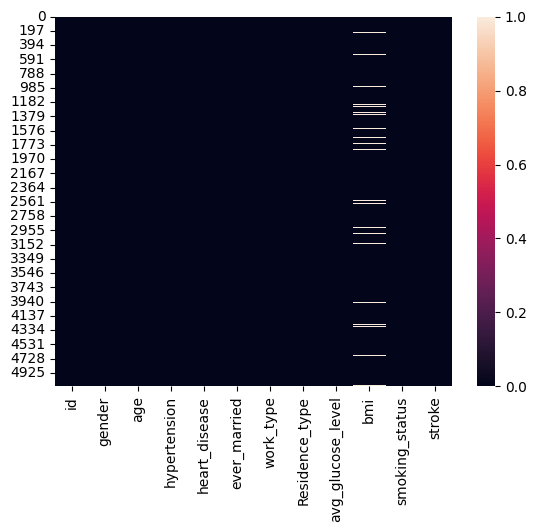

In [9]:
sns.heatmap(df.isna()) #missing values only in bmi spread randomly all across dataset

In [10]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True) #replace missing valuse in bmi with mean
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [11]:
# percentage of the dataset has a history of stroke

df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

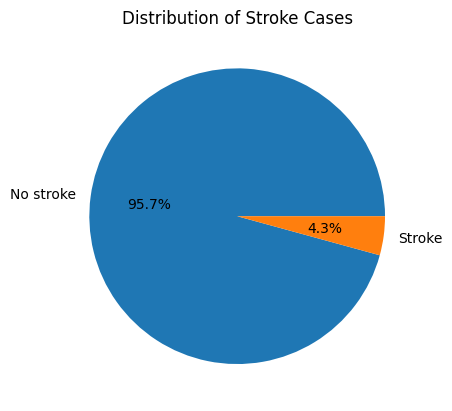

In [12]:
#inbalanced data, presented in pie chart

stroke_count = [4700,209]
labels = ('No stroke', 'Stroke')
plt.pie(stroke_count, labels = labels, autopct = '%1.1f%%')
plt.title('Distribution of Stroke Cases')
plt.show()

In [13]:
#male-to-female ratio
#how does it relate to stroke occurences

df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [14]:
df.drop(df.loc[df['gender'] == 'Other'].index, inplace= True)

In [15]:
stroke_rate_gender = df.groupby('gender')['stroke'].mean()
stroke_rate_gender

gender
Female    0.047094
Male      0.051064
Name: stroke, dtype: float64

In [16]:
stroke_count_gender = stroke_rate_gender*df['gender'].value_counts()
stroke_count_gender

gender
Female    141.0
Male      108.0
dtype: float64

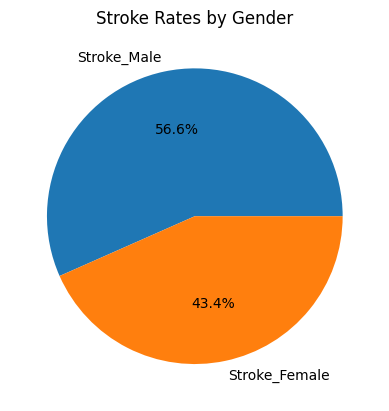

In [17]:
plt.pie(stroke_count_gender, labels = ['Stroke_Male','Stroke_Female'], autopct = '%1.1f%%')
plt.title('Stroke Rates by Gender')
plt.show()

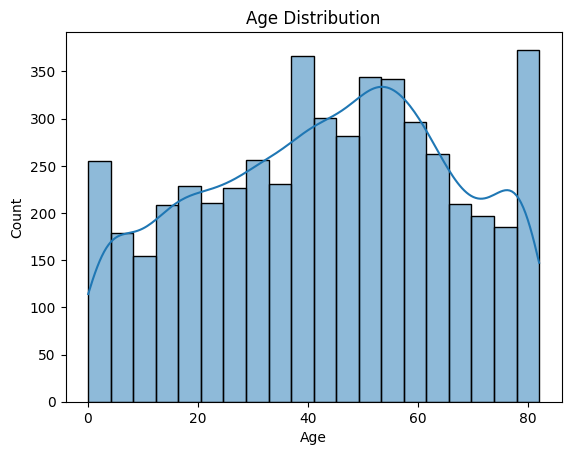

In [18]:
# relationship between age and stroke

sns.histplot(df['age'], kde = True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

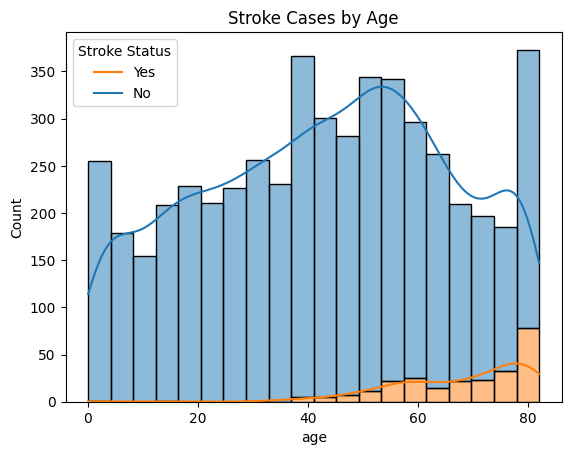

In [19]:
sns.histplot(df, x = 'age', hue = 'stroke', multiple = 'stack',kde=True)
plt.title('Stroke Cases by Age')
plt.legend(title = 'Stroke Status', labels = ['Yes','No'])
plt.show()

In [20]:
#Create age groups
df['age_group'] = pd.cut(df['age'],
                                  bins=[0, 40, 60, 80, 100], 
                                  labels=['<40', '40-60', '60-80', '80+'])
df['age_group']

0       60-80
1       60-80
2       60-80
3       40-60
4       60-80
        ...  
5105    60-80
5106      80+
5107      <40
5108    40-60
5109    40-60
Name: age_group, Length: 5109, dtype: category
Categories (4, object): ['<40' < '40-60' < '60-80' < '80+']

In [21]:
# Calculate stroke rate by age group and gender
age_stroke_rate = df.groupby('age_group')['stroke'].mean().reset_index()
age_stroke_rate

,age_group,stroke
0,<40,0.003567
1,40-60,0.040973
2,60-80,0.129630
3,80+,0.198276


<Figure size 500x500 with 0 Axes>

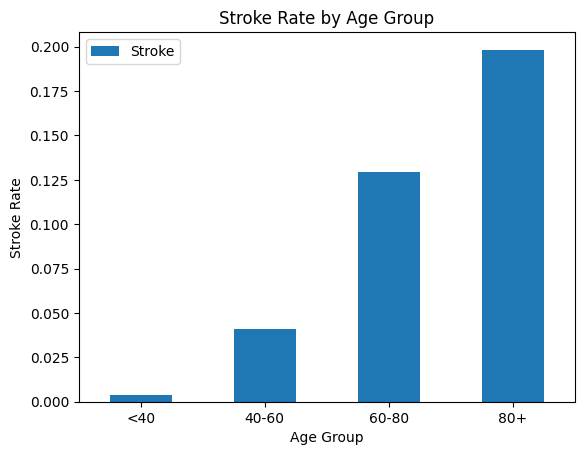

In [22]:
# Plot the stroke rate by age group and gender
plt.figure(figsize=(5, 5))
age_stroke_rate.plot(kind='bar',x ='age_group', stacked=True)
plt.title('Stroke Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Stroke Rate')
plt.xticks(rotation=0)
plt.legend([ 'Stroke'])
plt.show();

In [23]:
#how does features like hypertension and heart disease correlate with stroke

df['hypertension'].value_counts()

hypertension
0    4611
1     498
Name: count, dtype: int64

In [24]:
stroke_rate_hypertension = df.groupby('hypertension')['stroke'].mean()
stroke_rate_hypertension

hypertension
0    0.039688
1    0.132530
Name: stroke, dtype: float64

In [25]:
stroke_count_hypertension = stroke_rate_hypertension*df['hypertension'].value_counts()
stroke_count_hypertension

hypertension
0    183.0
1     66.0
dtype: float64

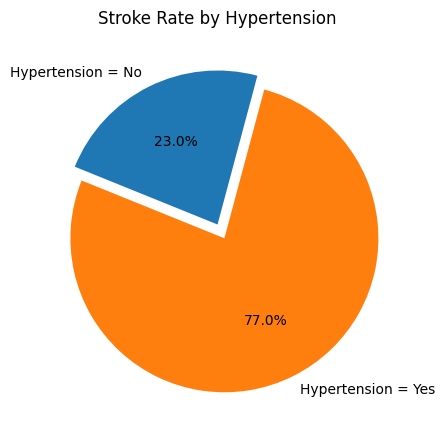

In [26]:
# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(stroke_rate_hypertension, 
        labels= ['Hypertension = No','Hypertension = Yes'],
        autopct='%1.1f%%', startangle=75, explode=[0,0.1])
plt.title('Stroke Rate by Hypertension')
plt.show();

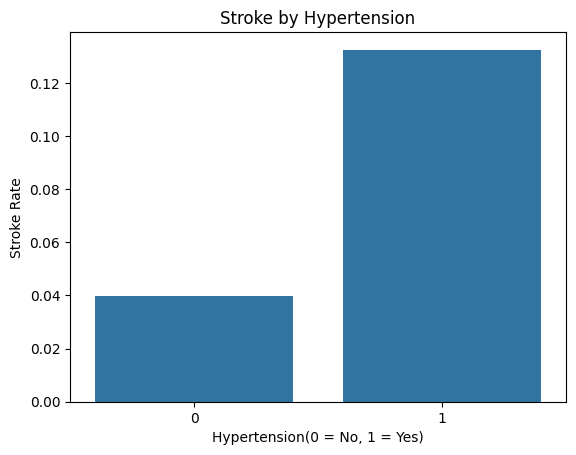

In [27]:
sns.barplot(x = stroke_rate_hypertension.index, y = stroke_rate_hypertension.values)
plt.title('Stroke by Hypertension')
plt.xlabel('Hypertension(0 = No, 1 = Yes)')
plt.ylabel('Stroke Rate')
plt.show()

In [28]:
#heart disease

df['heart_disease'].value_counts()

heart_disease
0    4833
1     276
Name: count, dtype: int64

In [29]:
stroke_rate_heart_disease = df.groupby('heart_disease')['stroke'].mean()
stroke_rate_heart_disease

heart_disease
0    0.041796
1    0.170290
Name: stroke, dtype: float64

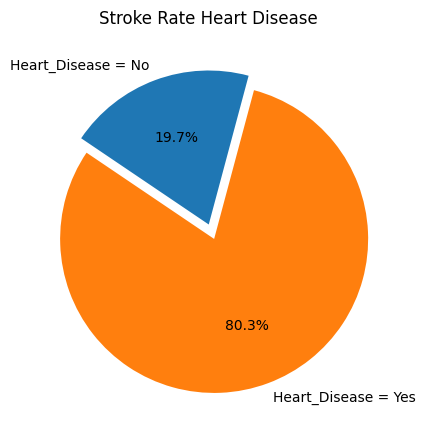

In [30]:
# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(stroke_rate_heart_disease,
        labels= ['Heart_Disease = No','Heart_Disease = Yes'], 
        autopct='%1.1f%%', startangle=75,explode=[0,0.1])
plt.title('Stroke Rate Heart Disease')
plt.show();

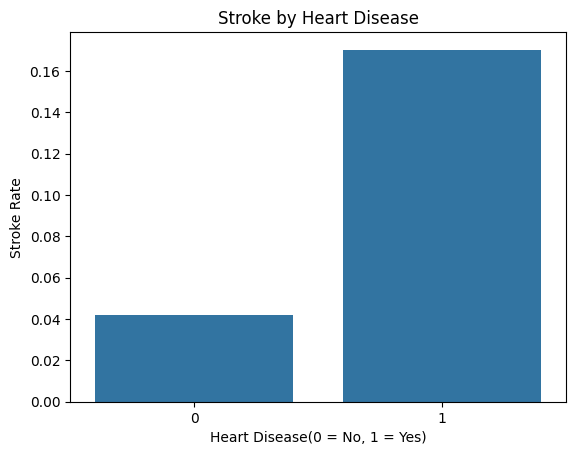

In [31]:
sns.barplot(x = stroke_rate_heart_disease.index, y = stroke_rate_heart_disease.values)
plt.title('Stroke by Heart Disease')
plt.xlabel('Heart Disease(0 = No, 1 = Yes)')
plt.ylabel('Stroke Rate')
plt.show()

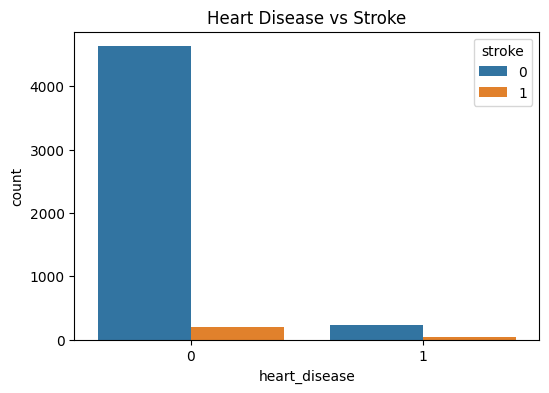

In [32]:
# Heart Disease vs Stroke
plt.figure(figsize=(6, 4))
sns.countplot(data= df, x='heart_disease', hue = 'stroke')
plt.title("Heart Disease vs Stroke")
plt.show()

In [33]:
#ever_married

df['ever_married'].value_counts().reset_index()

,ever_married,count
0,Yes,3353
1,No,1756


In [34]:
ever_married_stroke_rate = df.groupby('ever_married')['stroke'].mean()
ever_married_stroke_rate

ever_married
No     0.016515
Yes    0.065613
Name: stroke, dtype: float64

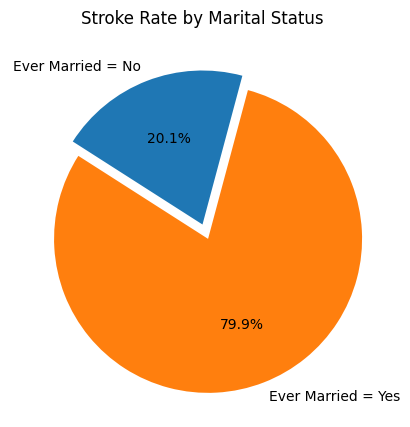

In [35]:
plt.figure(figsize=(5,5))
plt.pie(ever_married_stroke_rate, labels= ['Ever Married = No',
                                           'Ever Married = Yes'], 
        autopct='%1.1f%%', startangle=75,
         explode=[0, 0.1])
plt.title('Stroke Rate by Marital Status')
plt.show()

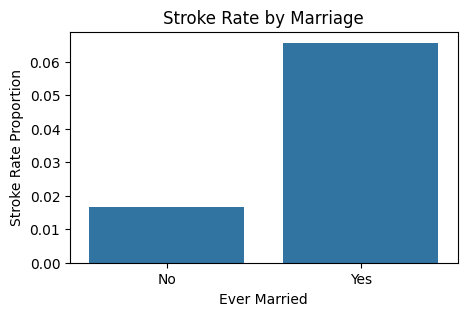

In [36]:
plt.figure(figsize=(5, 3))
sns.barplot(x=ever_married_stroke_rate.index,
            y=ever_married_stroke_rate.values)
plt.title('Stroke Rate by Marriage')
plt.xlabel('Ever Married')
plt.ylabel('Stroke Rate Proportion')
plt.show()

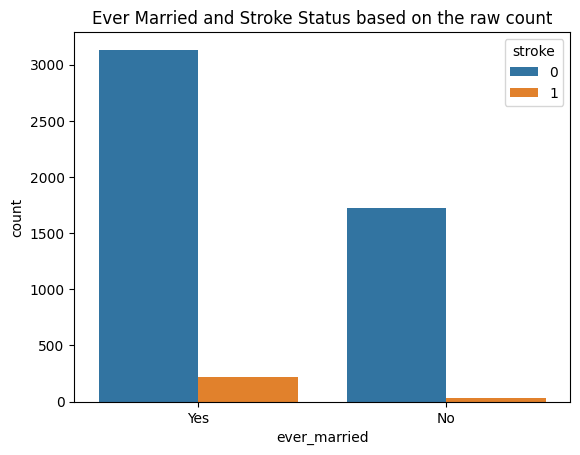

In [37]:
sns.countplot(data= df, x='ever_married', hue='stroke')
plt.title('Ever Married and Stroke Status based on the raw count')
plt.show();

In [38]:
# lets check the count of work type from the raw dataset
df['work_type'].value_counts().reset_index()

,work_type,count
0,Private,2924
1,Self-employed,819
2,children,687
3,Govt_job,657
4,Never_worked,22


In [39]:
stroke_rate_work = df.groupby('work_type')['stroke'].mean()
stroke_rate_work

work_type
Govt_job         0.050228
Never_worked     0.000000
Private          0.050958
Self-employed    0.079365
children         0.002911
Name: stroke, dtype: float64

In [40]:
work_type = {
    'work_type': ['Govt_job', 'Never_worked', 'Private', 'Self-employed ','children'],
    'stroke_rate': [0.050228, 0.000000, 0.050958, 0.079365,0.002911 ]}
work_type

{'work_type': ['Govt_job',
  'Never_worked',
  'Private',
  'Self-employed ',
  'children'],
 'stroke_rate': [0.050228, 0.0, 0.050958, 0.079365, 0.002911]}

In [41]:
stroke_work = pd.DataFrame(work_type)
stroke_work

,work_type,stroke_rate
0,Govt_job,0.050228
1,Never_worked,0.000000
2,Private,0.050958
3,Self-employed,0.079365
4,children,0.002911


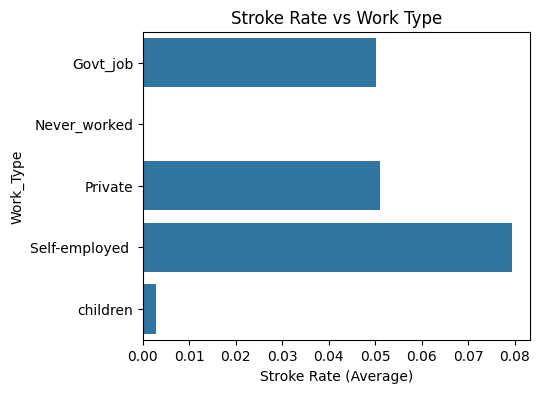

In [42]:
plt.figure(figsize=(5, 4))
sns.barplot(data= stroke_work, y='work_type',
            x='stroke_rate')
plt.title('Stroke Rate vs Work Type')
plt.xlabel('Stroke Rate (Average)')
plt.ylabel('Work_Type')
plt.show()

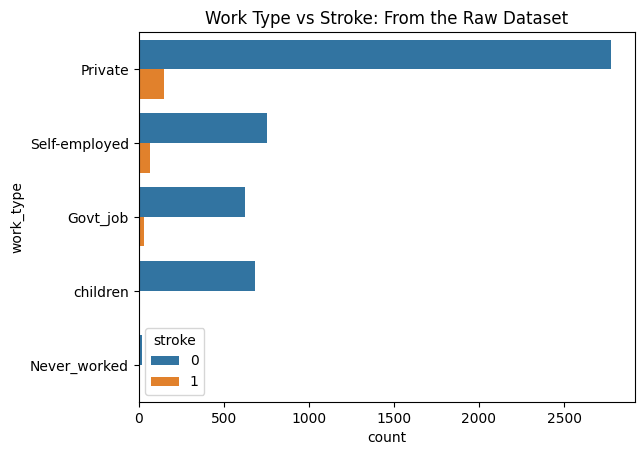

In [43]:
sns.countplot(data= df, y='work_type', hue='stroke')
plt.title("Work Type vs Stroke: From the Raw Dataset")
plt.show()

In [44]:
df['Residence_type'].value_counts().reset_index()

,Residence_type,count
0,Urban,2596
1,Rural,2513


In [45]:
stroke_rate_residence = df.groupby('Residence_type')['stroke'].mean()
stroke_rate_residence

Residence_type
Rural    0.045364
Urban    0.052003
Name: stroke, dtype: float64

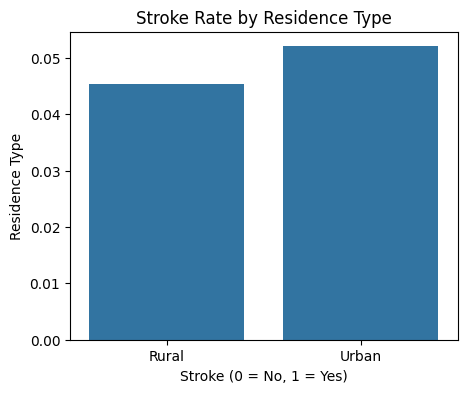

In [46]:
plt.figure(figsize=(5, 4))
sns.barplot(x=stroke_rate_residence.index,
            y=stroke_rate_residence.values)
plt.title('Stroke Rate by Residence Type')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Residence Type')
plt.show()

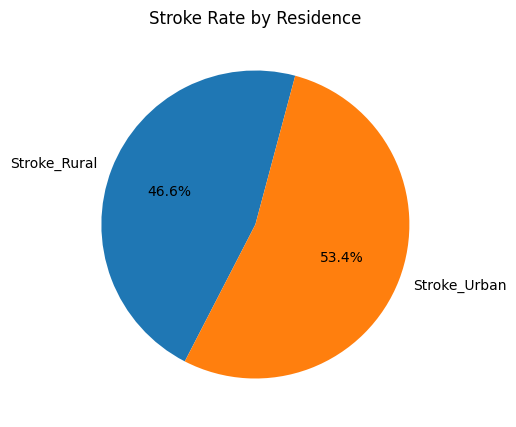

In [47]:
plt.figure(figsize=(5, 5))
plt.pie(stroke_rate_residence, labels= ['Stroke_Rural', 'Stroke_Urban'], 
        autopct='%1.1f%%', startangle=75, explode=[0, 0.0])
plt.title('Stroke Rate by Residence')
plt.show();

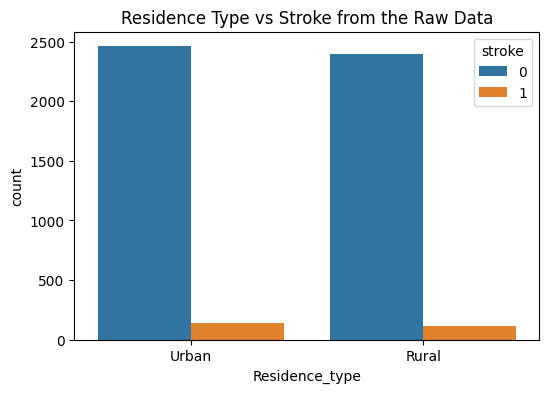

In [48]:
plt.figure(figsize=(6, 4))
sns.countplot(data= df, x='Residence_type', hue = 'stroke')
plt.title("Residence Type vs Stroke from the Raw Data")
plt.show()

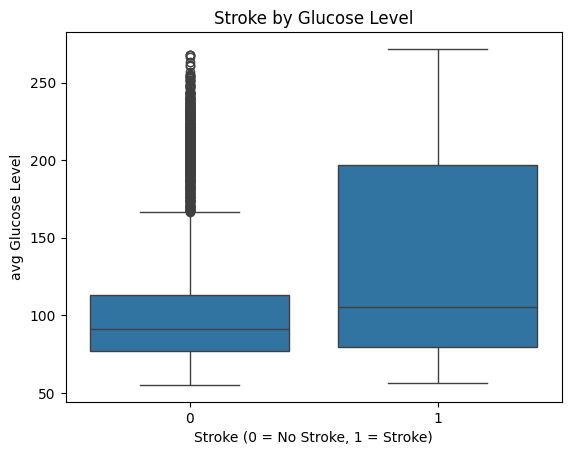

In [49]:
#relationship between average glucose level and stroke

sns.boxplot(x = 'stroke', y = 'avg_glucose_level', data = df)
plt.title('Stroke by Glucose Level')
plt.xlabel('Stroke (0 = No Stroke, 1 = Stroke)')
plt.ylabel('avg Glucose Level')
plt.show()

#glucose level increase is a risk of having a stroke

In [50]:
mean_glucose = df['avg_glucose_level'].mean()
mean_glucose

np.float64(106.14039929536114)

In [51]:
mean_age = df['age'].mean()
mean_age

np.float64(43.22998629868859)

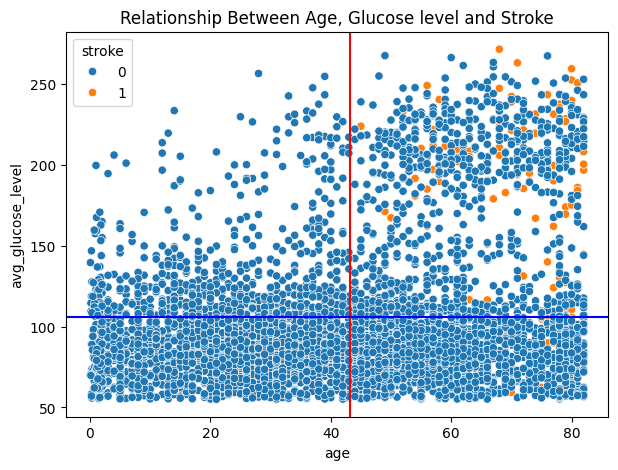

In [52]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='age', y='avg_glucose_level',hue = 'stroke', data=df)
plt.axvline(mean_age, color='red', linestyle='-',
            label=f'Mean Age: {mean_age:.2f}')
plt.axhline(mean_glucose, color='blue', linestyle='-',
            label=f'Mean Glucose: {mean_glucose:.2f}')
plt.title('Relationship Between Age, Glucose level and Stroke')
plt.show()

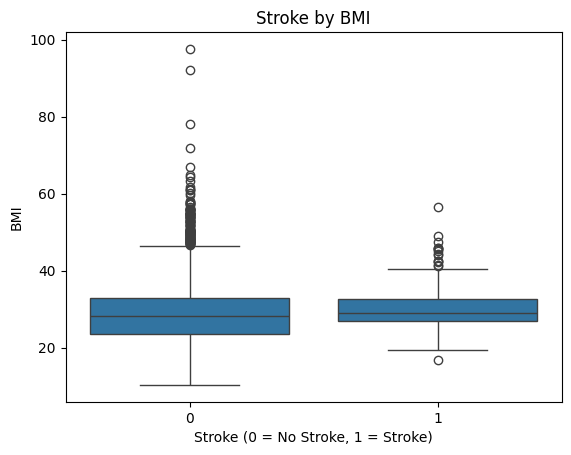

In [53]:
#relationship between BMI and stroke

sns.boxplot(x = 'stroke', y = 'bmi', data = df)
plt.title('Stroke by BMI')
plt.xlabel('Stroke (0 = No Stroke, 1 = Stroke)')
plt.ylabel('BMI')
plt.show()

In [54]:
mean_bmi = df['bmi'].mean()
mean_bmi

np.float64(28.894507852666028)

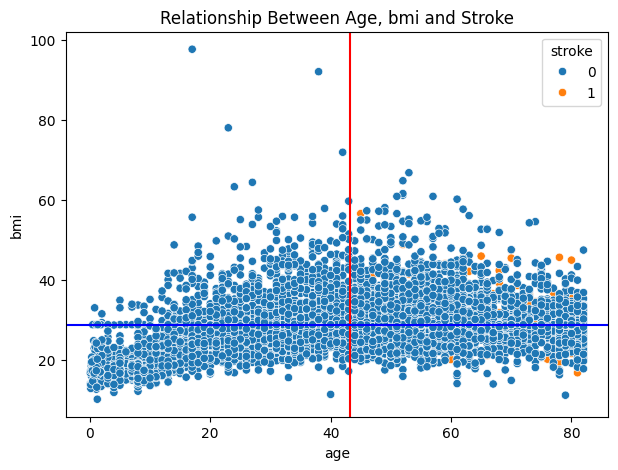

In [55]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='age', y='bmi',hue = 'stroke', data=df)
plt.axvline(mean_age, color='red', linestyle='-',
            label=f'Mean age: {mean_age:.2f}')
plt.axhline(mean_bmi, color='blue', linestyle='-',
            label=f'Mean bmi: {mean_bmi:.2f}')
plt.title('Relationship Between Age, bmi and Stroke')
plt.show()

In [56]:
#does smoke status affect smoke risks

df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64

In [57]:
stroke_rate_smoking = df.groupby('smoking_status')['stroke'].mean()
stroke_rate_smoking 

smoking_status
Unknown            0.030440
formerly smoked    0.079186
never smoked       0.047569
smokes             0.053232
Name: stroke, dtype: float64

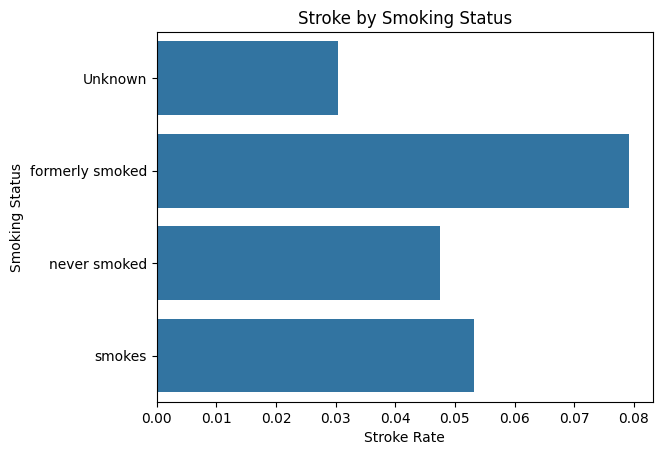

In [58]:
smoking_data = {'smoking_status':['Unknown','formerly smoked','never smoked','smokes'],
'stroke_rate': [0.030440, 0.079186, 0.047569,0.053232]
}


sns.barplot(data = pd.DataFrame(smoking_data), y = 'smoking_status', x = 'stroke_rate')
plt.title('Stroke by Smoking Status')
plt.xlabel('Stroke Rate')
plt.ylabel('Smoking Status')
plt.show()

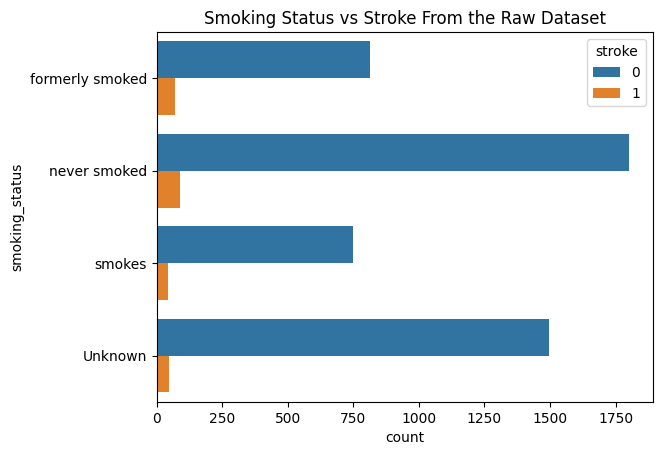

In [59]:
sns.countplot(data= df, y='smoking_status', hue='stroke')
plt.title("Smoking Status vs Stroke From the Raw Dataset")
plt.show()

In [60]:
df = df.drop(columns = ['age_group'],axis = 0)
df = df.drop(columns = ['id'], axis = 0)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [61]:
label_encoder = LabelEncoder()
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
# Apply label encoding to each categorical column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


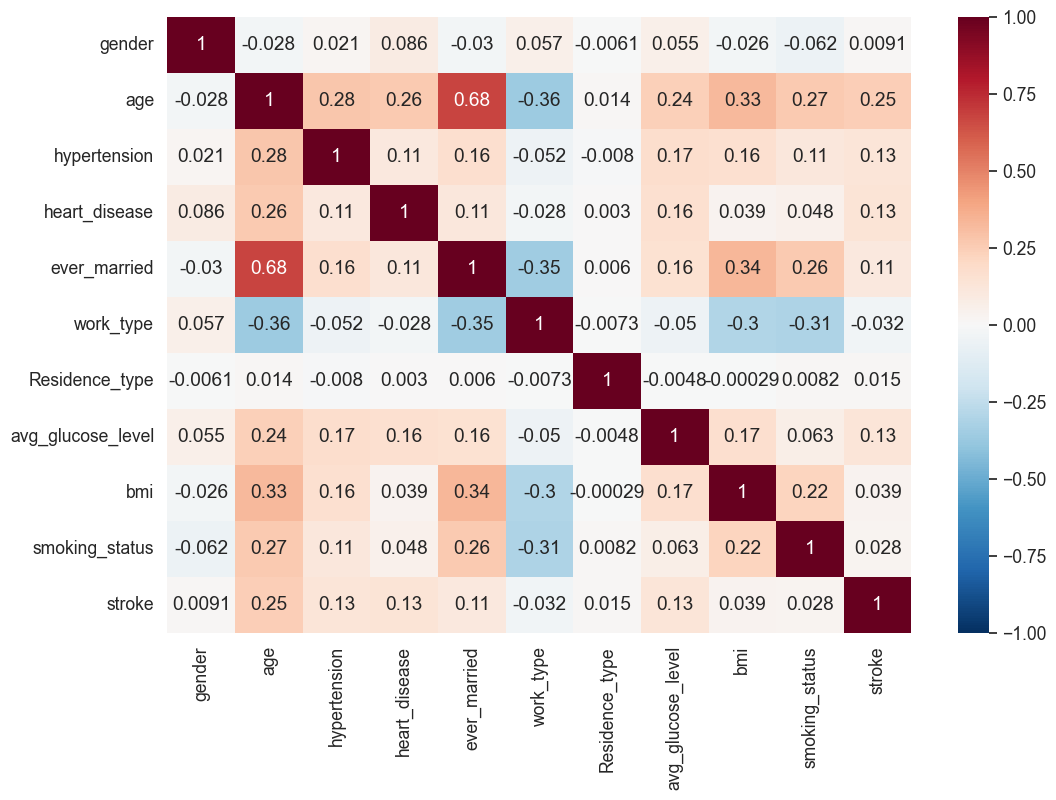

In [62]:
correlation_matrix = df.corr()
sns.set(font_scale=1.15)
plt.figure(figsize=(12,8))
sns.heatmap(
    correlation_matrix,        
    cmap='RdBu_r', # задаёт цветовую схему
    annot=True, # рисует значения внутри ячеек
    vmin=-1, vmax=1); # указывает начало цветовых кодов от -1 до 1.

In [63]:
X = df.drop(['stroke'], axis=1)
y = df['stroke']

In [64]:
df['age'] = df['age'].apply(lambda x : round(x))

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=2025)

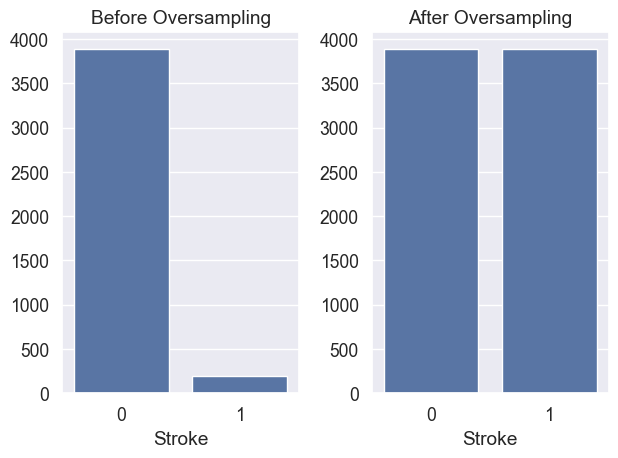

In [66]:
#data is imbalanced, Oversampling the data using Synthetic Minority Oversampling Technique.
fig, (ax1, ax2) = plt.subplots(1, 2)

sns.barplot(x=['0', '1'], y =[sum(y_train == 0), sum(y_train == 1)], ax = ax1)
ax1.set_title("Before Oversampling")
ax1.set_xlabel('Stroke')

sm = SMOTE(random_state = 42) 
X_train, y_train = sm.fit_resample(X_train, y_train) 

sns.barplot(x=['0', '1'], y =[sum(y_train == 0), sum(y_train == 1)], ax = ax2)
ax2.set_title("After Oversampling")
ax2.set_xlabel('Stroke')

plt.tight_layout()
plt.show()

In [67]:
#model building
xgb_model = XGBClassifier(random_state=2025)
cat_model = CatBoostClassifier(random_state=2025, verbose=False)

In [68]:
def fine_tune(model, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_, np.sqrt((-1)*grid_search.best_score_)

In [69]:
param_grid_1 = [{'n_estimators': [20, 40, 60, 80, 100], 'max_depth': [2, 4, 6, 8], 'max_leaves': [50, 100, 200]}]
param_grid_2 = [{'n_estimators': [20, 40, 60, 80, 100], 'max_depth': [2, 3, 4, 6, 8]}]

a = fine_tune(xgb_model, param_grid_1)
b = fine_tune(cat_model, param_grid_2)

In [70]:
print('RMSE values and parameters\n')
print('xgboost:      ',a[1],a[0])
print('catboost:     ',b[1],b[0])

RMSE values and parameters

xgboost:       0.22071396185175554 {'max_depth': 8, 'max_leaves': 50, 'n_estimators': 100}
catboost:      0.274681399925979 {'max_depth': 8, 'n_estimators': 100}


In [71]:
model_xgb = XGBClassifier(max_depth=2, max_leaves=50, n_estimators=100)

In [72]:
eval_set = [(X_train, y_train), (X_test, y_test)]

In [73]:
model_xgb.fit(X_train, y_train, eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.59326	validation_1-logloss:0.59104
[1]	validation_0-logloss:0.53750	validation_1-logloss:0.53889
[2]	validation_0-logloss:0.50386	validation_1-logloss:0.51197
[3]	validation_0-logloss:0.47919	validation_1-logloss:0.48860
[4]	validation_0-logloss:0.46084	validation_1-logloss:0.47677
[5]	validation_0-logloss:0.44412	validation_1-logloss:0.46008
[6]	validation_0-logloss:0.42954	validation_1-logloss:0.44922
[7]	validation_0-logloss:0.41949	validation_1-logloss:0.43704
[8]	validation_0-logloss:0.41067	validation_1-logloss:0.43381
[9]	validation_0-logloss:0.40183	validation_1-logloss:0.42535
[10]	validation_0-logloss:0.39430	validation_1-logloss:0.42014
[11]	validation_0-logloss:0.38588	validation_1-logloss:0.41263
[12]	validation_0-logloss:0.37961	validation_1-logloss:0.40785
[13]	validation_0-logloss:0.37297	validation_1-logloss:0.39995
[14]	validation_0-logloss:0.36823	validation_1-logloss:0.39777
[15]	validation_0-logloss:0.36389	validation_1-logloss:0.39566
[1

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [74]:
y_pred_xgb = model_xgb.predict(X_test)

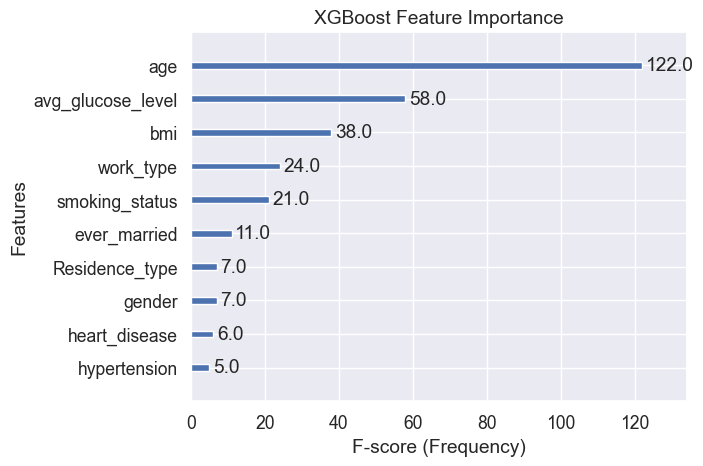

In [75]:
plot_importance(model_xgb)
plt.title("XGBoost Feature Importance")
plt.xlabel("F-score (Frequency)")
plt.ylabel("Features")
plt.show()

In [76]:
cm = confusion_matrix(y_test, y_pred_xgb)

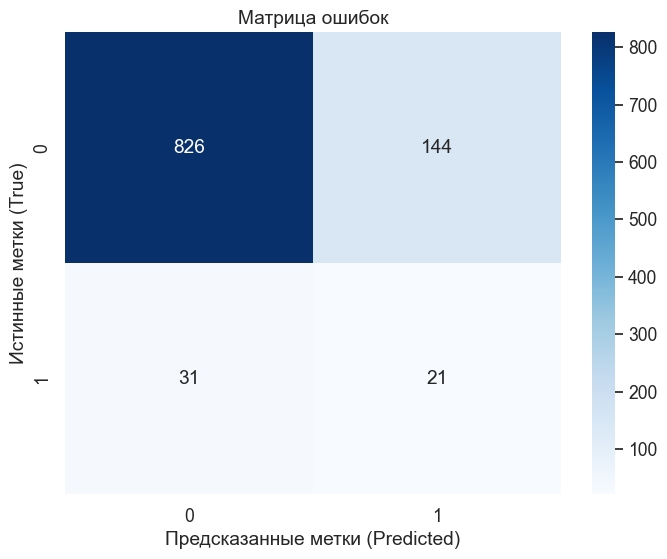

In [77]:
labels = sorted(list(set(y_test)))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Предсказанные метки (Predicted)')
plt.ylabel('Истинные метки (True)')
plt.title('Матрица ошибок')
plt.show()

In [78]:
print(f'Classification Report \n\n{classification_report(y_test,y_pred_xgb)}')

Classification Report 

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       970
           1       0.13      0.40      0.19        52

    accuracy                           0.83      1022
   macro avg       0.55      0.63      0.55      1022
weighted avg       0.92      0.83      0.87      1022



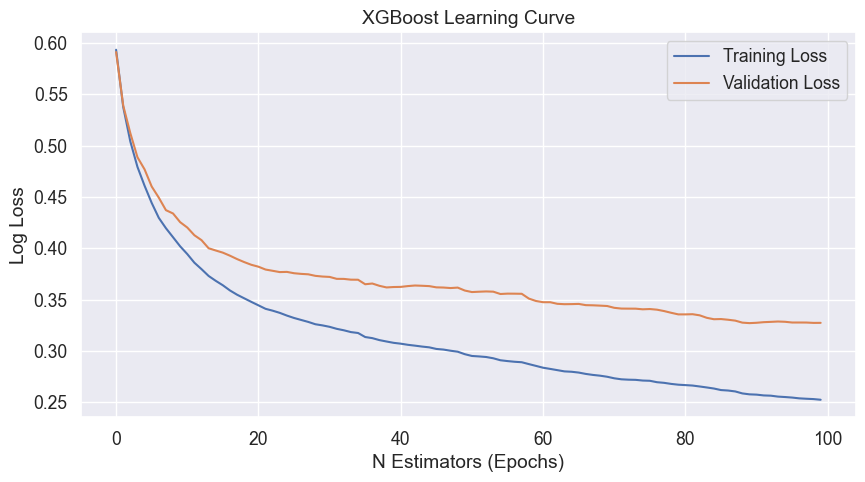

In [79]:
results = model_xgb.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

# Plot the log loss
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x_axis, results['validation_0']['logloss'], label='Training Loss')
ax.plot(x_axis, results['validation_1']['logloss'], label='Validation Loss')
ax.set_xlabel("N Estimators (Epochs)")
ax.set_ylabel("Log Loss")
ax.set_title("XGBoost Learning Curve")
ax.legend()
plt.show()